In [2]:
import random    
import pycosat     
import numpy as np
from matplotlib import pyplot as plt

T = 100 
N = 11

def randomFormula(numberOfClauses, n = 100, k = 3):
    S = [1,-1] 
    V = range(1, n + 1)

    formula = [] 

    for _ in range(numberOfClauses):
        clause = []
        for _ in range(k):
            x = random.choice(V) * random.choice(S)
            clause.append(x)
        #
        formula.append(clause)
    #

    return formula 
#

In [3]:
def CalculateProbability(k = 3):
    results  = []

    for a in np.arange(1, 10, 0.1):
        S = 0
        for _ in range(T):
            formula = randomFormula(int(N * a), n = N, k = 3)
            if pycosat.solve(formula) == 'UNSAT': continue 
            S += 1
        #
        results.append(S / T)
    #

    return np.arange(1, 10, 0.1), results 
# end procedure CalculateProbability()

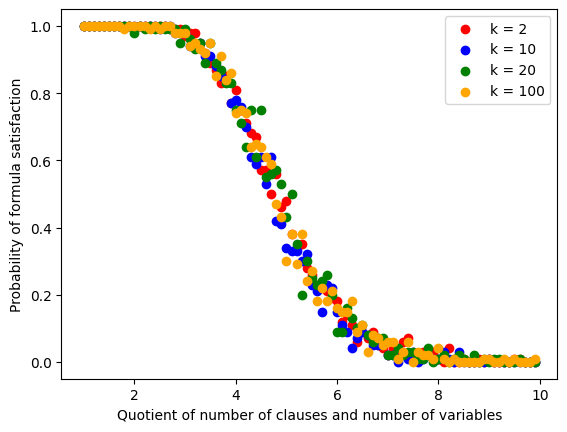

In [5]:
k1 = 2
x1, y1 = CalculateProbability(k = k1)

k2 = 10
x2, y2 = CalculateProbability(k = k2)

k3 = 20
x3, y3 = CalculateProbability(k = k3)

k4 = 100
x4, y4 = CalculateProbability(k = k4)

plt.xlabel(f'Quotient of number of clauses and number of variables')
plt.ylabel('Probability of formula satisfaction')

plt.scatter(x1, y1, color='red', label=f'k = {k1}')
plt.scatter(x2, y2, color='blue', label=f'k = {k2}')
plt.scatter(x3, y3, color='green', label=f'k = {k3}')
plt.scatter(x4, y4, color='orange', label=f'k = {k4}')

plt.legend()
plt.show()